In [8]:
from sklearn.decomposition import PCA

In [9]:
import pandas
from pystain import StainDataset

In [10]:
subject_id = 15035

In [11]:
subject_ids = [13095, 14037, 14051, 14069, 15033, 15035, 15055]

In [12]:
ds = StainDataset(13095)

/home/gdholla1/data/post_mortem/new_data_format/13095/images.hdf5


In [13]:
conversion_matrix = np.array([[0, 0, ds.xy_resolution],
                      [-ds.z_resolution, 0, 0],
                      [0, -ds.xy_resolution, 0]])

In [17]:
from matplotlib.backends.backend_pdf import PdfPages

import os

from scipy import ndimage

In [18]:
results = []

fn = '/home/gdholla1/projects/bias/post_mortem/figures/PCA_sectors/S1_PCA_sectors.pdf'
pdf = PdfPages(fn)


for subject_id in subject_ids:

    ds = StainDataset(subject_id, fwhm=0.3)
    
    
    # Get coordinates of mask and bring them to mm
    x, y, z = np.where(ds.thresholded_mask)
    coords = np.column_stack((x, y, z))

    coords_mm = conversion_matrix.dot(coords.T).T
    coords_mm -= coords_mm.mean(0)
    
    
    # Fit two components and make sure first axis walks dorsal
    # and second component lateral
    pca = PCA()
    pca.fit_transform((coords_mm - coords_mm.mean(0))[:, (0, 2)])

    components = pca.components_
    print components

    if components[0, 1] < 0:
        components[0] = -components[0]

    if components[1, 0] < 0:
        components[1] = -components[1]
        
    print components
        
    coords_dataframe = pandas.DataFrame(coords_mm, columns=['x_mm', 'y_mm', 'z_mm'])
    coords_dataframe['slice'] = x

    coords_dataframe['pc1'] = components.dot(coords_mm[:, (0, 2)].T)[0, :]
    coords_dataframe['pc2'] = components.dot(coords_mm[:, (0, 2)].T)[1, :]

    coords_dataframe[['pc1_slice_center', 'pc2_slice_center']] = coords_dataframe.groupby(['slice'])[['pc1', 'pc2']].apply(lambda x: x - x.mean())

    coords_dataframe['anterior'] = (coords_dataframe.y_mm > coords_dataframe.y_mm.mean()).map({True:'anterior', False:'posterior'})

    coords_dataframe.ix[(coords_dataframe.pc1_slice_center > 0) & (coords_dataframe.pc2_slice_center > 0), 'sector_2d'] = 'dorsolateral'
    coords_dataframe.ix[(coords_dataframe.pc1_slice_center > 0) & (coords_dataframe.pc2_slice_center < 0), 'sector_2d'] = 'dorsomedial'
    coords_dataframe.ix[(coords_dataframe.pc1_slice_center < 0) & (coords_dataframe.pc2_slice_center > 0), 'sector_2d'] = 'ventrolateral'
    coords_dataframe.ix[(coords_dataframe.pc1_slice_center < 0) & (coords_dataframe.pc2_slice_center < 0), 'sector_2d'] = 'ventromedial'        
    
    
    plt.figure(figsize=(20, 20))

    n_slices = np.ceil(len(ds.slices) / 2.)

    for i, slice in enumerate(ds.slices[::2]):
        plt.subplot(np.ceil(n_slices / 4.), 4, i+1)

        ds.plot_coronal_slice(slice)

        y_mean, x_mean = ndimage.center_of_mass(ds.thresholded_mask[i*2])
        x_mean = ds.get_x_coordinate(x_mean)
        y_mean = ds.get_z_coordinate(y_mean)

        t = np.linspace(-5, 5)        

        x =  x_mean + components[0, 0] * t
        y = y_mean + components[0,1] * t        

        if i*2 > coords_dataframe.slice.mean():
            c = 'red'
        else:
            c = 'green'

        plt.plot(x, y, c=c, ls='-', lw=3)   


        x =  x_mean + components[1, 0] * t
        y = y_mean + components[1,1] * t        
        plt.plot(x, y, c=c, ls='--', lw=3)   
        
    plt.suptitle(subject_id)
    
    plt.savefig(pdf, format='pdf')
    plt.close(plt.gcf())

    
    df= pandas.concat((ds.smoothed_dataframe, coords_dataframe), 1)
    tmp = df.pivot_table(index=['sector_2d', 'anterior'], values=ds.stains, aggfunc='mean').copy()
    tmp['subject_id'] = subject_id
    
    results.append(tmp.copy())

pdf.close()

/home/gdholla1/data/post_mortem/new_data_format/13095/images.hdf5
[[-0.97056185 -0.24085203]
 [-0.24085203  0.97056185]]
[[ 0.97056185  0.24085203]
 [ 0.24085203 -0.97056185]]
(1896, 1512) (1896, 1512)


/usr/local/lib/python2.7/dist-packages/scipy/ndimage/measurements.py:1284: RuntimeWarning: invalid value encountered in double_scalars
  for dir in range(input.ndim)]


(1896, 1512) (1896, 1512)
(1896, 1512) (1896, 1512)
(1896, 1512) (1896, 1512)
(1896, 1512) (1896, 1512)
(1896, 1512) (1896, 1512)
(1896, 1512) (1896, 1512)
(1896, 1512) (1896, 1512)
(1896, 1512) (1896, 1512)
(1896, 1512) (1896, 1512)
(1896, 1512) (1896, 1512)
(1896, 1512) (1896, 1512)
(1896, 1512) (1896, 1512)
/home/gdholla1/data/post_mortem/new_data_format/14037/images.hdf5
[[-0.95649419 -0.29175138]
 [ 0.29175138 -0.95649419]]
[[ 0.95649419  0.29175138]
 [ 0.29175138 -0.95649419]]
(1704, 1360) (1704, 1360)
(1704, 1360) (1704, 1360)
(1704, 1360) (1704, 1360)
(1704, 1360) (1704, 1360)
(1704, 1360) (1704, 1360)
(1704, 1360) (1704, 1360)
(1704, 1360) (1704, 1360)
(1704, 1360) (1704, 1360)
(1704, 1360) (1704, 1360)
(1704, 1360) (1704, 1360)
(1704, 1360) (1704, 1360)
(1704, 1360) (1704, 1360)
(1704, 1360) (1704, 1360)
(1704, 1360) (1704, 1360)
(1704, 1360) (1704, 1360)
/home/gdholla1/data/post_mortem/new_data_format/14051/images.hdf5
[[-0.78933812 -0.61395874]
 [ 0.61395874 -0.78933812]]
[

In [19]:
df = pandas.concat(results).reset_index().set_index(['subject_id', 'sector_2d', 'anterior'])
df = pandas.melt(df.reset_index(), id_vars=['subject_id', 'sector_2d', 'anterior'], var_name='stain')
df['value'] = df.groupby(['subject_id', 'stain']).transform(lambda x: (x - x.mean()) / x.std())

In [20]:
sns.set_style('whitegrid')
sns.set_context('poster')

/usr/local/lib/python2.7/dist-packages/seaborn/categorical.py:3367: UserWarning: The `x_order` parameter has been renamed `order`
  UserWarning)


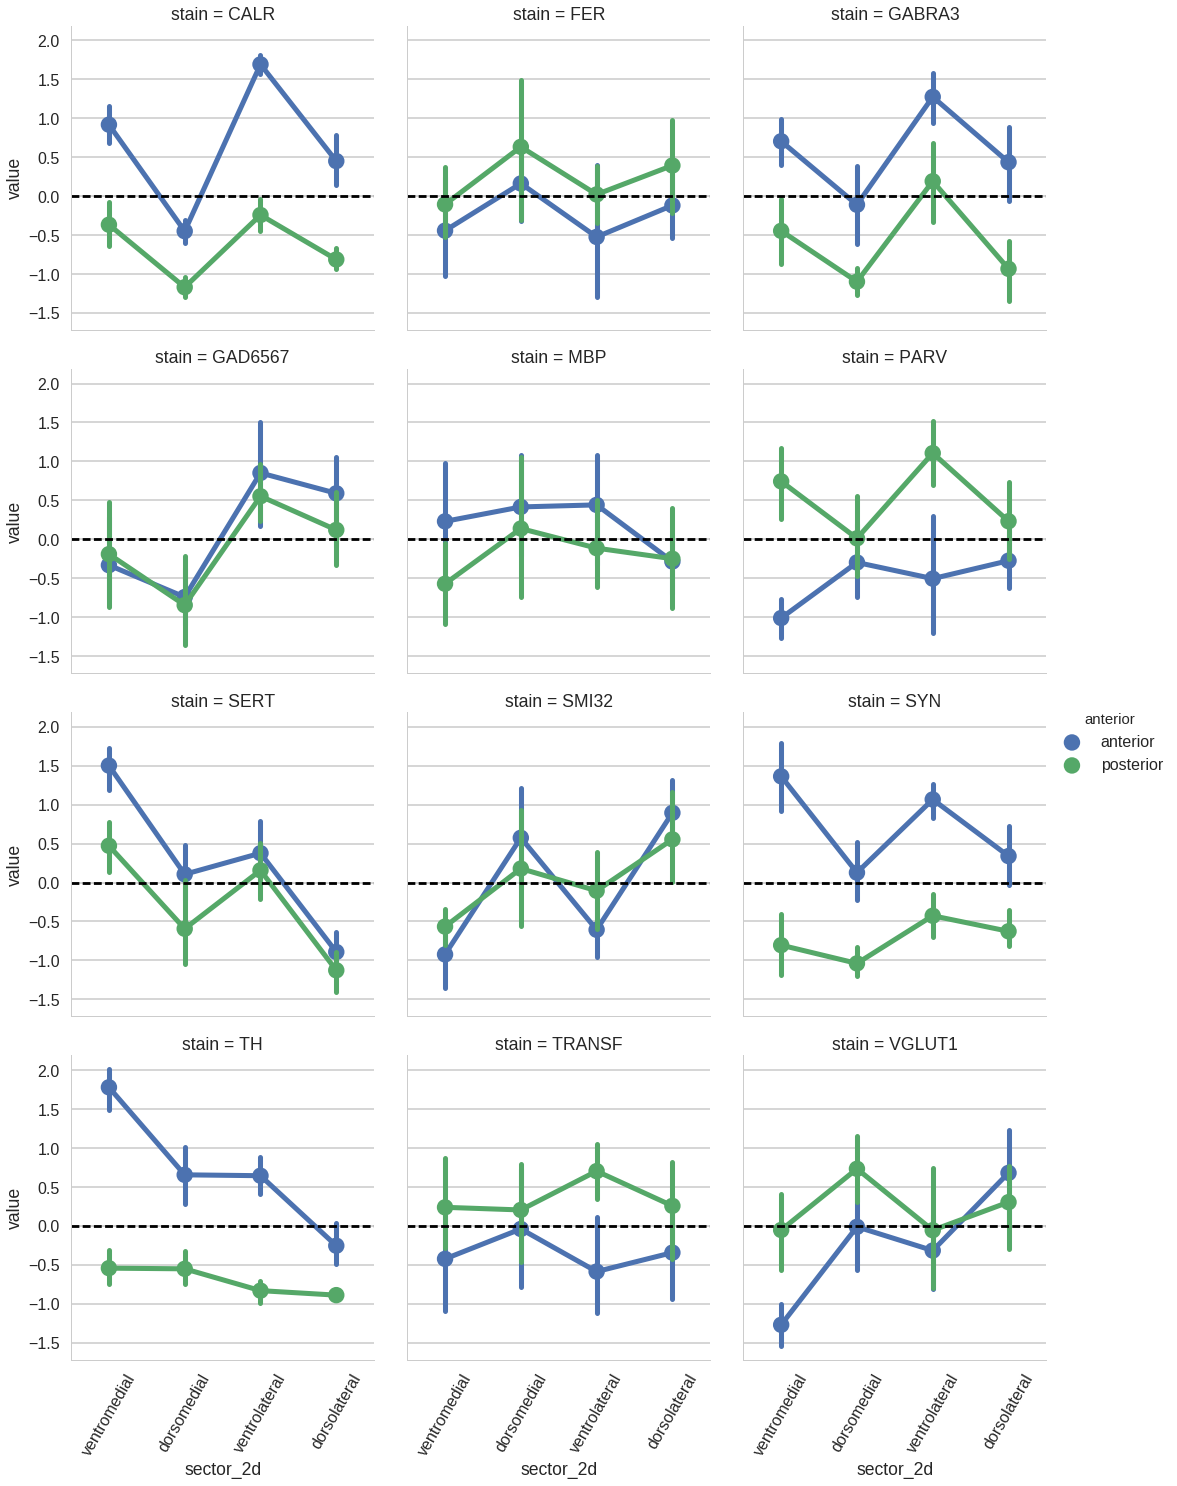

In [21]:
fac = sns.factorplot('sector_2d', 'value', 'anterior', df, col='stain', col_wrap=3, x_order=['ventromedial', 'dorsomedial', 'ventrolateral', 'dorsolateral'], ci=95, size=5)

for ax in fac.axes.ravel():
    ax.axhline(0, c='k', ls='--')
    
fac.set_xticklabels(rotation=60)

In [22]:
def plot_quarter_ellipse(values, ellipse_pars=None, size=(1000, 1000), vmin=None, vmax=None, cmap=plt.cm.coolwarm, **kwargs):

    if ellipse_pars is None:
        a = 350
        b = 150
        x = 500
        y= 500

        theta = 45. / 180 * np.pi
        
    else:
        a, b, x, y, theta = ellipse_pars
        
    A = a**2 * (np.sin(theta))**2 + b**2 * (np.cos(theta))**2
    B = 2 * (b**2 - a**2) * np.sin(theta) * np.cos(theta)
    C = a**2 * np.cos(theta)**2 + b**2 * np.sin(theta)**2
    D = -2 * A * x - B* y
    E = -B * x - 2 * C * y
    F = A* x**2 + B*x*y + C*y**2 - a**2*b**2
    
    
    X,Y = np.meshgrid(np.arange(size[0]), np.arange(size[1]))
    
    in_ellipse = A*X**2 + B*X*Y +C*Y**2 + D*X + E*Y +F < 0
    
        
    upper_left, upper_right, lower_left, lower_right = values
    
    pc1 = np.array([[np.cos(theta)], [np.sin(theta)]])
    pc2 = np.array([[np.cos(theta - np.pi/2.)], [np.sin(theta - np.pi/2.)]])
    
    pc1_distance = pc1.T.dot(np.array([(X - x).ravel(), (Y - y).ravel()])).reshape(X.shape)
    pc2_distance = pc2.T.dot(np.array([(X - x).ravel(), (Y - y).ravel()])).reshape(X.shape)
    
    im = np.zeros_like(X, dtype=float)
    im[in_ellipse * (pc1_distance > 0) & (pc2_distance < 0)] = upper_left
    im[in_ellipse * (pc1_distance > 0) & (pc2_distance > 0)] = upper_right

    im[in_ellipse * (pc1_distance < 0) & (pc2_distance < 0)] = lower_left
    im[in_ellipse * (pc1_distance < 0) & (pc2_distance > 0)] = lower_right
    
    im = np.ma.masked_array(im, ~in_ellipse)
    cax = plt.imshow(im, origin='lower', cmap=plt.cm.coolwarm, vmin=vmin, vmax=vmax, **kwargs)
    plt.grid('off')
    sns.despine()
    
    return cax

In [28]:
from matplotlib import patches
fn = '/home/gdholla1/projects/post_mortem/reports/PCA_sectors/S2_PCA_sector_intensities.pdf'
pdf = PdfPages(fn)

In [29]:
for stain, d in df.groupby(['stain']):
    
    fig = plt.figure(figsize=(20, 15))
    fig, axes = plt.subplots(nrows=1, ncols=2)

    plt.suptitle(stain)
    
    ax = plt.subplot(121)
    plt.title('anterior')
    
    # upper left
    
    values = []
    for zone in ['dorsomedial', 'dorsolateral', 'ventromedial', 'ventrolateral']:
    
        t, p = sp.stats.ttest_1samp(d[(d.anterior == 'anterior') & (d.sector_2d == zone)].value, 0)
        
        if p < 0.05:
            values.append(t)
        else:
            values.append(np.nan)
    
    plot_quarter_ellipse(values)
    
    plt.xlabel('medial -- lateral')
    plt.ylabel('ventral -- dorsal')
    
    
    e1 = patches.Ellipse((500, 500), 350*2, 150*2,
                     angle=45, linewidth=2, fill=False, zorder=2)

    ax.add_patch(e1)
    
    plt.xticks([])
    plt.yticks([])    
    
    ax = plt.subplot(122)
    plt.title('posterior')
    
    # upper left
    
    values = []
    for zone in ['dorsomedial', 'dorsolateral', 'ventromedial', 'ventrolateral']:
    
        t, p = sp.stats.ttest_1samp(d[(d.anterior == 'posterior') & (d.sector_2d == zone)].value, 0)
        
        if p < 0.01:
            values.append(t)
        else:
            values.append(np.nan)
    
    im_ax = plot_quarter_ellipse(values, vmin=-7, vmax=7)
    plt.xlabel('medial -- lateral')
    plt.ylabel('ventral -- dorsal')
    plt.xticks([])
    plt.yticks([])
    
    e1 = patches.Ellipse((500, 500), 350*2, 150*2,
                     angle=45, linewidth=2, fill=False, zorder=2)    
    
    ax.add_patch(e1)    
    
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.3, 0.015, 0.4])
    fig.colorbar(im_ax, cax=cbar_ax, ticks=[-7, -3.5, 0., 3.5, 7.])
    
    pdf.savefig(fig)
    plt.close(plt.gcf())

pdf.close()